In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

In [6]:
rain = pd.read_excel(r"C:\Users\laksh\OneDrive\rainfall.xlsx")
temp = pd.read_excel(r"C:\Users\laksh\OneDrive\temperature.xlsx")

# temp['YEAR'].astype('str')
# temp['Year'] = pd.to_datetime(temp['YEAR'], format = "%Y")

# rain['YEAR'].astype('str')
# rain['Year'] = pd.to_datetime(rain['YEAR'], format = "%Y")

In [7]:
temp

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,24.23,18.71,26.06,27.30,21.92
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,24.33,19.70,26.44,27.18,21.49
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,23.80,19.05,25.47,27.17,21.27
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,23.86,18.66,25.84,26.83,21.42
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,23.71,17.58,24.99,27.37,21.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21,24.91,20.12,26.29,27.73,22.99
115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89,26.45,22.25,28.86,28.44,24.20
116,2017,20.59,23.08,25.58,29.17,30.47,29.44,28.31,28.12,28.11,27.24,23.92,21.47,26.29,21.84,28.41,28.50,24.21
117,2018,19.90,22.58,26.01,28.48,29.99,29.58,28.19,27.73,27.63,26.42,23.84,20.41,25.90,21.24,28.16,28.28,23.55


In [17]:
def temp_predict():
    data = temp[['YEAR', 'ANNUAL']]
    print(data)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

    reg = linear_model.LinearRegression()
    reg.fit(X,y)
    
    def viz_linear():
        plt.scatter(X_train, y_train, color = 'red')
        plt.plot(X_train, reg.predict(X_train), color = 'blue')
        plt.xlabel('Year')
        plt.title('Temperature from 1901-2019')
        plt.ylabel('Annual Temperature')
        plt.show()

    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = linear_model.LinearRegression()
    pol_reg.fit(X_poly, y)

    # Visualizing the Polymonial Regression results
    def viz_polymonial():
        plt.scatter(X, y, color='orange')
        plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='black')
        plt.title('Temperature from 1901-2019')
        plt.xlabel('Year')
        plt.ylabel('Annual Temperature')
        plt.show()
        return
    viz_linear()
    viz_polymonial()
    test = int(input("Enter the year for which you want the predicted value: "))
    print(pol_reg.predict(poly_reg.fit_transform([[test]])))

     YEAR  ANNUAL
0    1901   24.23
1    1902   24.33
2    1903   23.80
3    1904   23.86
4    1905   23.71
..    ...     ...
114  2015   24.91
115  2016   26.45
116  2017   26.29
117  2018   25.90
118  2019   25.86

[119 rows x 2 columns]


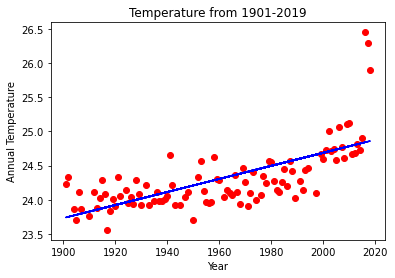

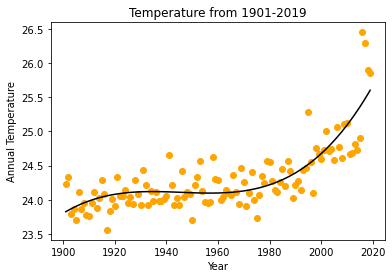

Enter the year for which you want the predicted value: 2030
[26.43150733]


In [18]:
temp_predict()

In [19]:
def rain_predict():
    print('You have the option to choose from the following subdivision keywords: \n')
    for i in rain['SUBDIVISION'].unique():
        print(i)

    subd = str(input('Enter the subdivision for which data is required: '))
    dt_rain = rain.loc[rain['SUBDIVISION'] == subd, ['YEAR', 'ANNUAL']]
    dt_rain

    X1 = dt_rain.iloc[:, :-1].values
    y1 = dt_rain.iloc[:, -1].values
    from sklearn.model_selection import train_test_split 
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=0)

    reg1 = linear_model.LinearRegression()
    reg1.fit(X1,y1)
    
    def viz_linear1():
        plt.scatter(X1_train, y1_train, color = 'red')
        plt.plot(X1_train, reg1.predict(X1_train), color = 'blue')
        plt.xlabel('Year')
        plt.ylabel('Annual Rainfall')
        plt.show()

    poly_reg1 = PolynomialFeatures(degree=4)
    X1_poly = poly_reg1.fit_transform(X1)
    pol_reg1 = linear_model.LinearRegression()
    pol_reg1.fit(X1_poly, y1)

    # Visualizing the Polymonial Regression results
    def viz_polymonial1():
        plt.scatter(X1, y1, color='orange')
        plt.plot(X1, pol_reg1.predict(poly_reg1.fit_transform(X1)), color='black')
        plt.title('Temperature from 1901-2019')
        plt.xlabel('Year')
        plt.ylabel('Annual Rainfall')
        plt.show()
        return
    viz_linear1()
    viz_polymonial1()
    test_rain = int(input("Enter the year for which you want the predicted value: "))
    print(pol_reg1.predict(poly_reg1.fit_transform([[test_rain]])))

In [21]:
def temp_show():
    a = int(input('Enter the year for which data is required: '))
    data = temp.loc[temp['YEAR'] == a]
    data = data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']]
    display(data)
    plot_temp_data = data[['JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
    plot_temp_data.plot.bar()

Enter the year for which data is required: 1950


,YEAR,JAN,FEB,MAR,APR,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
49,1950,18.36,19.05,22.45,25.72,28.21,27.03,26.63,25.6,24.07,21.03,18.33,23.71


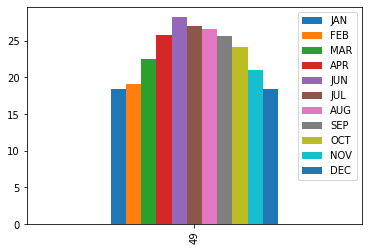

In [22]:
temp_show()

In [23]:
def rain_show():
    print('You have the option to choose from the following subdivision keywords: \n')
    for i in rain['SUBDIVISION'].unique():
        print(i)

    sub = str(input('Enter the subdivision for which data is required: '))
    data_rain = rain.loc[rain['SUBDIVISION'] == sub]
    data_rain
    b = int(input('Enter the year for which data is required: '))
    data_rain = data_rain[data_rain['YEAR']==b]
    data_rain = data_rain[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']]
    display(data_rain)
    plot_data = data_rain[['JAN', 'FEB', 'MAR', 'APR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
    plot_data.plot.bar()

<font size="5">MAIN FUNCTION</font>

In [24]:
print('Select your operation:\n 1. Show Temperature Data\n 2. Show Rainfall Data\n 3. Predict Temperature Data\n 4. Predict Rainfall Data')
ans = int(input('Enter your choice: '))
print('\n')
if ans == 1:
    temp_show()
elif ans == 2:
    rain_show()
elif ans == 3:
    temp_predict()
elif ans == 4:
    rain_predict()
else:
    print('Invalid input')

Select your operation:
 1. Show Temperature Data
 2. Show Rainfall Data
 3. Predict Temperature Data
 4. Predict Rainfall Data


KeyboardInterrupt: Interrupted by user